<a href="https://colab.research.google.com/github/namek97/Code_accumulative/blob/main/Code_acd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing TA-LIB
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib
import talib

In [ ]:
#installing yfinance
!pip install yfinance 
import yfinance as yf
import pandas as pd
pd.set_option("display.max")

In [16]:
symbol="TATAMOTORS.NS"

In [17]:
df=yf.Ticker(symbol).history(period="2y",interval="1d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-10 00:00:00+05:30,319.500000,324.450012,316.700012,321.450012,58643853,0.0,0.0
2021-03-12 00:00:00+05:30,325.049988,326.500000,314.149994,317.549988,48360842,0.0,0.0
2021-03-15 00:00:00+05:30,320.000000,320.399994,310.049988,318.549988,45081385,0.0,0.0
2021-03-16 00:00:00+05:30,321.000000,321.899994,315.100006,319.950012,39267404,0.0,0.0
2021-03-17 00:00:00+05:30,318.600006,320.000000,304.000000,305.799988,47262481,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-03 00:00:00+05:30,422.600006,430.500000,421.950012,428.000000,8027522,0.0,0.0
2023-03-06 00:00:00+05:30,430.950012,441.450012,430.000000,440.100006,11307064,0.0,0.0
2023-03-08 00:00:00+05:30,439.000000,441.250000,436.100006,439.299988,7850052,0.0,0.0


In [18]:
df["MA_10"]=talib.MA(df["Close"],timeperiod=10)
df["MA_50"]=talib.MA(df["Close"],timeperiod=50)
df["RSI_14"]=talib.RSI(df["Close"],timeperiod=14)
df["ATR_14"]=talib.ATR(df["High"],df["Low"],df["Close"],timeperiod=14)



<AxesSubplot:xlabel='Date'>

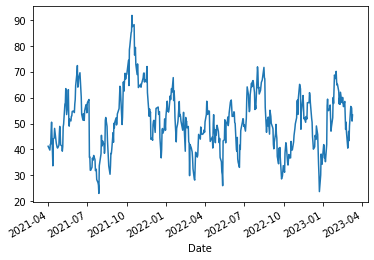

In [22]:
df['RSI_14'].plot()